In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Loading Dataset

#Training Data

In [2]:
train = pd.read_csv('D:\\train.csv')
train.head()

,rn,activity,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,7,STANDING,0.279,-0.0196,-0.1100,-0.997,-0.967,-0.983,-0.997,-0.966,...,0.146,-0.217,-0.5640,-0.2130,-0.2310,0.0146,-0.190,-0.852,0.182,-0.0430
1,11,STANDING,0.277,-0.0127,-0.1030,-0.995,-0.973,-0.985,-0.996,-0.974,...,0.121,0.349,0.0577,0.0807,0.5960,-0.4760,0.116,-0.852,0.188,-0.0347
2,14,STANDING,0.277,-0.0147,-0.1070,-0.999,-0.991,-0.993,-0.999,-0.991,...,0.740,-0.564,-0.7660,0.1060,-0.0903,-0.1320,0.499,-0.850,0.189,-0.0351
3,15,STANDING,0.298,0.0271,-0.0617,-0.989,-0.817,-0.902,-0.989,-0.794,...,0.131,0.208,-0.0681,0.0623,-0.0587,0.0312,-0.269,-0.731,0.283,0.0364
4,20,STANDING,0.276,-0.0170,-0.1110,-0.998,-0.991,-0.998,-0.998,-0.989,...,0.667,-0.942,-0.9660,0.2450,0.1030,0.0661,-0.412,-0.761,0.263,0.0296


# Preprocessing

Exploring Dataset

In [3]:
train.columns

Index(['rn', 'activity', 'tBodyAcc.mean.X', 'tBodyAcc.mean.Y',
       'tBodyAcc.mean.Z', 'tBodyAcc.std.X', 'tBodyAcc.std.Y', 'tBodyAcc.std.Z',
       'tBodyAcc.mad.X', 'tBodyAcc.mad.Y',
       ...
       'fBodyBodyGyroJerkMag.meanFreq', 'fBodyBodyGyroJerkMag.skewness',
       'fBodyBodyGyroJerkMag.kurtosis', 'angle.tBodyAccMean.gravity',
       'angle.tBodyAccJerkMean.gravityMean', 'angle.tBodyGyroMean.gravityMean',
       'angle.tBodyGyroJerkMean.gravityMean', 'angle.X.gravityMean',
       'angle.Y.gravityMean', 'angle.Z.gravityMean'],
      dtype='object', length=563)

In [4]:
train.shape

(3609, 563)

In [5]:
train.describe()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
count,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,...,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000,3609.000000
mean,5152.430590,0.274544,-0.017415,-0.109195,-0.608457,-0.506265,-0.614482,-0.634634,-0.521660,-0.616047,...,0.128804,-0.300815,-0.619400,0.007561,0.009484,0.029185,-0.010632,-0.496977,0.060040,-0.050202
std,2975.767839,0.063589,0.042589,0.056218,0.439157,0.501627,0.399514,0.413194,0.485282,0.394932,...,0.240278,0.317963,0.308303,0.332249,0.448971,0.613615,0.490830,0.509336,0.311308,0.263935
min,7.000000,-0.521000,-1.000000,-0.926000,-1.000000,-0.999000,-1.000000,-1.000000,-0.999000,-1.000000,...,-0.786000,-0.968000,-0.995000,-0.969000,-0.997000,-1.000000,-0.993000,-0.999000,-1.000000,-0.971000
25%,2570.000000,0.262000,-0.025200,-0.122000,-0.992000,-0.976000,-0.979000,-0.993000,-0.976000,-0.978000,...,-0.015800,-0.533000,-0.836000,-0.118000,-0.281000,-0.478000,-0.398000,-0.816000,-0.015600,-0.122000
50%,5158.000000,0.277000,-0.017200,-0.109000,-0.939000,-0.812000,-0.844000,-0.946000,-0.816000,-0.837000,...,0.132000,-0.341000,-0.706000,0.007740,0.009830,0.029600,-0.013400,-0.716000,0.183000,-0.005260
75%,7727.000000,0.287000,-0.011000,-0.098000,-0.254000,-0.051700,-0.283000,-0.306000,-0.084500,-0.288000,...,0.290000,-0.118000,-0.501000,0.142000,0.309000,0.554000,0.374000,-0.522000,0.252000,0.104000
max,10281.000000,0.693000,1.000000,1.000000,1.000000,0.980000,1.000000,1.000000,0.988000,1.000000,...,0.871000,0.990000,0.957000,0.981000,0.997000,0.999000,0.996000,0.977000,1.000000,0.998000


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3609 entries, 0 to 3608
Columns: 563 entries, rn to angle.Z.gravityMean
dtypes: float64(561), int64(1), object(1)
memory usage: 15.5+ MB


In [7]:
temp = pd.DataFrame(index=train.columns)
temp['data_type'] = train.dtypes
temp['null_count'] = train.isnull().sum()
temp['unique_count'] = train.nunique()

In [8]:
temp

,data_type,null_count,unique_count
rn,int64,0,3609
activity,object,0,6
tBodyAcc.mean.X,float64,0,375
tBodyAcc.mean.Y,float64,0,1243
tBodyAcc.mean.Z,float64,0,689
...,...,...,...
angle.tBodyGyroMean.gravityMean,float64,0,1843
angle.tBodyGyroJerkMean.gravityMean,float64,0,1847
angle.X.gravityMean,float64,0,940
angle.Y.gravityMean,float64,0,1172


Filtering Dataset

In [9]:
df = train.drop_duplicates()
df.shape

(3609, 563)

In [10]:
df = df.drop('rn',axis=1)
df.shape

(3609, 562)

In [11]:
col = list( df.columns )
col

['activity',
 'tBodyAcc.mean.X',
 'tBodyAcc.mean.Y',
 'tBodyAcc.mean.Z',
 'tBodyAcc.std.X',
 'tBodyAcc.std.Y',
 'tBodyAcc.std.Z',
 'tBodyAcc.mad.X',
 'tBodyAcc.mad.Y',
 'tBodyAcc.mad.Z',
 'tBodyAcc.max.X',
 'tBodyAcc.max.Y',
 'tBodyAcc.max.Z',
 'tBodyAcc.min.X',
 'tBodyAcc.min.Y',
 'tBodyAcc.min.Z',
 'tBodyAcc.sma',
 'tBodyAcc.energy.X',
 'tBodyAcc.energy.Y',
 'tBodyAcc.energy.Z',
 'tBodyAcc.iqr.X',
 'tBodyAcc.iqr.Y',
 'tBodyAcc.iqr.Z',
 'tBodyAcc.entropy.X',
 'tBodyAcc.entropy.Y',
 'tBodyAcc.entropy.Z',
 'tBodyAcc.arCoeff.X.1',
 'tBodyAcc.arCoeff.X.2',
 'tBodyAcc.arCoeff.X.3',
 'tBodyAcc.arCoeff.X.4',
 'tBodyAcc.arCoeff.Y.1',
 'tBodyAcc.arCoeff.Y.2',
 'tBodyAcc.arCoeff.Y.3',
 'tBodyAcc.arCoeff.Y.4',
 'tBodyAcc.arCoeff.Z.1',
 'tBodyAcc.arCoeff.Z.2',
 'tBodyAcc.arCoeff.Z.3',
 'tBodyAcc.arCoeff.Z.4',
 'tBodyAcc.correlation.X.Y',
 'tBodyAcc.correlation.X.Z',
 'tBodyAcc.correlation.Y.Z',
 'tGravityAcc.mean.X',
 'tGravityAcc.mean.Y',
 'tGravityAcc.mean.Z',
 'tGravityAcc.std.X',
 'tGravityAc

In [12]:
len(col)

562

Plotting

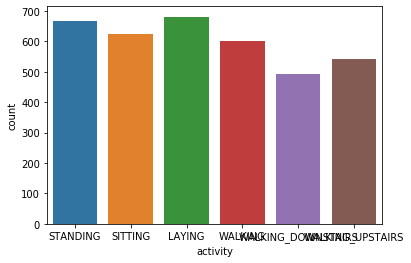

In [13]:
sns.countplot(x='activity',data=df)

# Standardization and Normalization

In [14]:
X = df[col[1:]].values
X[0:5]

array([[ 0.279 , -0.0196, -0.11  , ..., -0.852 ,  0.182 , -0.043 ],
       [ 0.277 , -0.0127, -0.103 , ..., -0.852 ,  0.188 , -0.0347],
       [ 0.277 , -0.0147, -0.107 , ..., -0.85  ,  0.189 , -0.0351],
       [ 0.298 ,  0.0271, -0.0617, ..., -0.731 ,  0.283 ,  0.0364],
       [ 0.276 , -0.017 , -0.111 , ..., -0.761 ,  0.263 ,  0.0296]])

In [15]:
Y = df['activity'].values
Y[0:5]

array(['STANDING', 'STANDING', 'STANDING', 'STANDING', 'STANDING'],
      dtype=object)

In [16]:
from sklearn.preprocessing import StandardScaler

In [17]:
X = StandardScaler().fit_transform(X)

In [18]:
X[0:5]

array([[ 0.07008998, -0.05130281, -0.01432096, ..., -0.69712768,
         0.39182231,  0.02729073],
       [ 0.03863356,  0.1107345 ,  0.1102126 , ..., -0.69712768,
         0.41109853,  0.05874224],
       [ 0.03863356,  0.06376716,  0.03905057, ..., -0.69320045,
         0.41431123,  0.0572265 ],
       [ 0.36892595,  1.04538448,  0.84496062, ..., -0.45953059,
         0.71630523,  0.32816414],
       [ 0.02290535,  0.00975473, -0.03211147, ..., -0.51843896,
         0.65205119,  0.30239664]])


# Splitting Dataset

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
x_train , x_test , y_train, y_test = train_test_split( X , Y ,test_size = 0.2 , random_state=5 )

# Classification Model

In [21]:
from sklearn.ensemble import RandomForestClassifier

In [22]:
model = RandomForestClassifier(n_estimators = 150)
model.fit(x_train , y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [23]:
y_hat = model.predict(x_test)

# Evaluation

In [24]:
from sklearn.metrics import classification_report

In [25]:
from sklearn.metrics import accuracy_score

In [26]:
print(classification_report(y_test , y_hat))

                    precision    recall  f1-score   support

            LAYING       1.00      1.00      1.00       119
           SITTING       0.96      0.93      0.94       122
          STANDING       0.94      0.97      0.95       144
           WALKING       0.98      0.97      0.97       126
WALKING_DOWNSTAIRS       0.94      0.96      0.95        94
  WALKING_UPSTAIRS       0.97      0.96      0.96       117

          accuracy                           0.96       722
         macro avg       0.96      0.96      0.96       722
      weighted avg       0.96      0.96      0.96       722



In [27]:
acc = accuracy_score(y_test,y_hat)

# Loading Training Data

In [28]:
test = pd.read_csv('D:\\test.csv')
test.head()

,rn,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,...,fBodyBodyGyroJerkMag.meanFreq,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean
0,3,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,...,0.4150,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491
1,5,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,...,0.0878,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439
2,9,0.277,-0.0218,-0.121,-0.997,-0.961,-0.984,-0.998,-0.957,-0.984,...,0.3140,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374
3,17,0.279,-0.0148,-0.117,-0.997,-0.982,-0.983,-0.997,-0.982,-0.981,...,0.5610,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270
4,26,0.279,-0.0145,-0.107,-0.998,-0.986,-0.993,-0.998,-0.985,-0.995,...,0.6770,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294


# Preprocessing

In [29]:
tdf = test.drop('rn',axis=1)

In [30]:
tdf.shape

(1541, 561)

In [31]:
tcol = list(tdf.columns)
tcol

['tBodyAcc.mean.X',
 'tBodyAcc.mean.Y',
 'tBodyAcc.mean.Z',
 'tBodyAcc.std.X',
 'tBodyAcc.std.Y',
 'tBodyAcc.std.Z',
 'tBodyAcc.mad.X',
 'tBodyAcc.mad.Y',
 'tBodyAcc.mad.Z',
 'tBodyAcc.max.X',
 'tBodyAcc.max.Y',
 'tBodyAcc.max.Z',
 'tBodyAcc.min.X',
 'tBodyAcc.min.Y',
 'tBodyAcc.min.Z',
 'tBodyAcc.sma',
 'tBodyAcc.energy.X',
 'tBodyAcc.energy.Y',
 'tBodyAcc.energy.Z',
 'tBodyAcc.iqr.X',
 'tBodyAcc.iqr.Y',
 'tBodyAcc.iqr.Z',
 'tBodyAcc.entropy.X',
 'tBodyAcc.entropy.Y',
 'tBodyAcc.entropy.Z',
 'tBodyAcc.arCoeff.X.1',
 'tBodyAcc.arCoeff.X.2',
 'tBodyAcc.arCoeff.X.3',
 'tBodyAcc.arCoeff.X.4',
 'tBodyAcc.arCoeff.Y.1',
 'tBodyAcc.arCoeff.Y.2',
 'tBodyAcc.arCoeff.Y.3',
 'tBodyAcc.arCoeff.Y.4',
 'tBodyAcc.arCoeff.Z.1',
 'tBodyAcc.arCoeff.Z.2',
 'tBodyAcc.arCoeff.Z.3',
 'tBodyAcc.arCoeff.Z.4',
 'tBodyAcc.correlation.X.Y',
 'tBodyAcc.correlation.X.Z',
 'tBodyAcc.correlation.Y.Z',
 'tGravityAcc.mean.X',
 'tGravityAcc.mean.Y',
 'tGravityAcc.mean.Z',
 'tGravityAcc.std.X',
 'tGravityAcc.std.Y',
 't

In [32]:
if col[1:]==tcol:
    print('Columns are similar , thus ready to use')

Columns are similar , thus ready to use


In [33]:
ttemp = pd.DataFrame(index=tdf.columns)
ttemp['data_type'] = tdf.dtypes
ttemp['null_count'] = tdf.isnull().sum()
ttemp['unique_count'] = tdf.nunique()

In [34]:
ttemp

,data_type,null_count,unique_count
tBodyAcc.mean.X,float64,0,288
tBodyAcc.mean.Y,float64,0,729
tBodyAcc.mean.Z,float64,0,417
tBodyAcc.std.X,float64,0,593
tBodyAcc.std.Y,float64,0,724
...,...,...,...
angle.tBodyGyroMean.gravityMean,float64,0,1091
angle.tBodyGyroJerkMean.gravityMean,float64,0,1097
angle.X.gravityMean,float64,0,683
angle.Y.gravityMean,float64,0,725


In [35]:
tdf = tdf.drop_duplicates()

In [36]:
tdf.shape

(1541, 561)

# Standardization and Normalization of Test Data

In [37]:
x = tdf.values

In [38]:
x = StandardScaler().fit_transform(x)

In [39]:
x[0:5]

array([[ 0.06893185, -0.05896875, -0.08179351, ..., -0.69639981,
         0.39528222,  0.02000022],
       [ 0.01946015,  0.05866066, -0.12503122, ..., -0.69444284,
         0.40846575,  0.03922449],
       [ 0.01946015, -0.15226103, -0.25474434, ..., -0.69444284,
         0.42164929,  0.06325482],
       [ 0.05244129,  0.13167202, -0.16826892, ..., -0.52027208,
         0.66884055,  0.30133993],
       [ 0.05244129,  0.14384058,  0.04791961, ..., -0.52614301,
         0.66224878,  0.31021266]])

# Prediction

In [40]:
pred = model.predict(x)

In [41]:
tdf['Activity'] = pred

In [42]:
tdf[0:5]

,tBodyAcc.mean.X,tBodyAcc.mean.Y,tBodyAcc.mean.Z,tBodyAcc.std.X,tBodyAcc.std.Y,tBodyAcc.std.Z,tBodyAcc.mad.X,tBodyAcc.mad.Y,tBodyAcc.mad.Z,tBodyAcc.max.X,...,fBodyBodyGyroJerkMag.skewness,fBodyBodyGyroJerkMag.kurtosis,angle.tBodyAccMean.gravity,angle.tBodyAccJerkMean.gravityMean,angle.tBodyGyroMean.gravityMean,angle.tBodyGyroJerkMean.gravityMean,angle.X.gravityMean,angle.Y.gravityMean,angle.Z.gravityMean,Activity
0,0.280,-0.0195,-0.113,-0.995,-0.967,-0.979,-0.997,-0.964,-0.977,-0.939,...,-0.391,-0.760,-0.11900,0.1780,0.101,0.809,-0.849,0.181,-0.0491,STANDING
1,0.277,-0.0166,-0.115,-0.998,-0.981,-0.990,-0.998,-0.980,-0.990,-0.942,...,-0.351,-0.699,0.12300,0.1230,0.694,-0.616,-0.848,0.185,-0.0439,STANDING
2,0.277,-0.0218,-0.121,-0.997,-0.961,-0.984,-0.998,-0.957,-0.984,-0.941,...,-0.269,-0.573,0.01300,0.0809,-0.234,0.118,-0.848,0.189,-0.0374,STANDING
3,0.279,-0.0148,-0.117,-0.997,-0.982,-0.983,-0.997,-0.982,-0.981,-0.942,...,-0.779,-0.940,-0.00145,-0.0481,-0.340,-0.229,-0.759,0.264,0.0270,STANDING
4,0.279,-0.0145,-0.107,-0.998,-0.986,-0.993,-0.998,-0.985,-0.995,-0.943,...,-0.715,-0.937,0.02570,0.0665,-0.226,-0.225,-0.762,0.262,0.0294,STANDING


In [43]:
print(f'The Task is completed with {acc*100}% accuracy!')

The Task is completed with 96.26038781163435% accuracy!
